In [13]:
%matplotlib widget

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, optimize
from roboticstoolbox import *
from spatialmath import *
import time
import math

In [ ]:
L1 = -165
L2 = -165

# leg = ET2.R() * ET2.ty(L1) * ET2.R() * ET2.ty(L2)
link1 = Link(ET.Ry(), name="link1")
link2 = Link(ET.tz(L1) * ET.Ry(), name="link2", parent=link1)
link3 = Link(ET.tz(L2), name="link3", parent=link2)
leg = ERobot([link1, link2, link3], name="mybot")

BACK_LEG = True
seed = 2
if BACK_LEG:
    seed = 1

via = np.array([
    [39.76, 0, -300],
    [-39.76, 0, -300],
    [-36.13, 0, -295],
    [-32.17, 0, -290],
    [-27.74, 0, -285],
    [-22.55, 0, -280],
    [-15.87, 0, -275],
    [-11.25, 0, -272.5],
    [-5.47, 0, -270.6],
    [0, 0, -270],
    [5.47, 0, -270.6],
    [11.25, 0, -272.5],
    [15.87, 0, -275],
    [22.55, 0, -280],
    [27.74, 0, -285],
    [32.17, 0, -290],
    [36.13, 0, -295],
    [39.76, 0, -300],
])

timesegments = np.array([
    1,
    1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8,
    1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8
])
dt = 0.01
traj = mstraj(via, tsegment=timesegments, dt=dt, tacc=0)
trajectory = traj.q

answer_arr = leg.ikine_LM(SE3.Trans(trajectory), mask=[1,0,1,0,0,0], seed=seed).q
q0 = answer_arr[:,0]
q1 = answer_arr[:,1]
trajectory.shape

(292, 3)

(292,)
(292,)


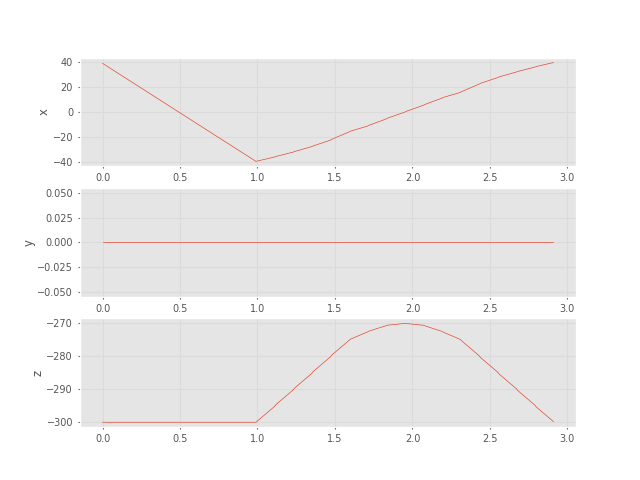

In [16]:
x_coords = trajectory[:,0]
y_coords = trajectory[:,1]
z_coords = trajectory[:,2]
t = np.arange(0, traj.t[-1]+dt, dt)

print(t.shape)
print(x_coords.shape)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.set_ylabel("x")
ax1.plot(t, x_coords)
ax2.set_ylabel("y")
ax2.plot(t, y_coords)
ax3.set_ylabel("z")
ax3.plot(t, z_coords)
plt.show()

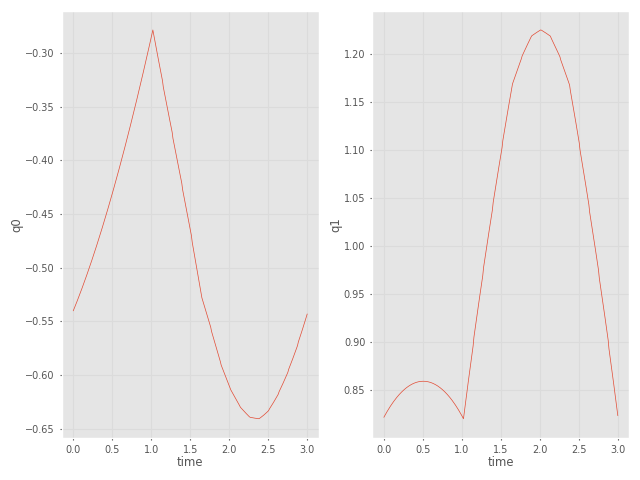

In [17]:
fig, ax = plt.subplots(1, 2)

ax[0].set_ylabel("q0")
ax[0].set_xlabel("time")
ax[0].plot(np.linspace(0, 3, answer_arr.shape[0]), q0)

ax[1].set_ylabel("q1")
ax[1].set_xlabel("time")
ax[1].plot(np.linspace(0, 3, answer_arr.shape[0]), q1)

plt.tight_layout()
plt.show()

In [18]:
with np.printoptions(threshold=np.inf):
    print(np.array2string(answer_arr, separator=","))

[[-0.540147  , 0.82197475],
 [-0.53830782, 0.82351154],
 [-0.53645001, 0.82501453],
 [-0.53457367, 0.82648385],
 [-0.53267891, 0.82791965],
 [-0.53076583, 0.82932207],
 [-0.52883453, 0.83069124],
 [-0.5268851 , 0.83202727],
 [-0.52491764, 0.83333031],
 [-0.52293225, 0.83460046],
 [-0.52092902, 0.83583784],
 [-0.51890804, 0.83704257],
 [-0.51686939, 0.83821474],
 [-0.51481317, 0.83935448],
 [-0.51273947, 0.84046187],
 [-0.51064836, 0.84153701],
 [-0.50853993, 0.84258001],
 [-0.50641426, 0.84359094],
 [-0.50427142, 0.8445699 ],
 [-0.50211151, 0.84551697],
 [-0.49993458, 0.84643224],
 [-0.49774073, 0.84731577],
 [-0.49553001, 0.84816765],
 [-0.49330251, 0.84898795],
 [-0.49105829, 0.84977674],
 [-0.48879743, 0.85053408],
 [-0.48651998, 0.85126003],
 [-0.48422603, 0.85195466],
 [-0.48191563, 0.85261802],
 [-0.47958884, 0.85325017],
 [-0.47724573, 0.85385116],
 [-0.47488637, 0.85442104],
 [-0.4725108 , 0.85495986],
 [-0.47011909, 0.85546765],
 [-0.4677113 , 0.85594447],
 [-0.46528748, 0.856